# **Effects of Advertising on Sales**

-------------------------------------------
## **Context and Objective**
-------------------------------------------

- An interesting application of regression is to quantify the effect of advertisement on sales. Various channels of advertisement are newspaper, TV, radio, etc. 
- In this case study, we will have a look at the advertising data of a company and try to see its effect on sales.
- We will also try to predict the sales given the different parameters of advertising. 

-------------------------
## **Dataset**
-------------------------

The data at hand has three features about the spending on advertising and the target variable is the net sales. Attributes are:

- **TV**    - Independent variable quantifying the budget for TV ads
- **Radio** - Independent variable quantifying the budget for radio ads 
- **News**  - Independent variable quantifying the budget for news ads
- **Sales** - Dependent variable quantifying the net sales

## **Importing the libraries**

In [38]:
import pandas as pd

import numpy as np

import numpy as np

from sklearn import linear_model

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## **Loading the data**

In [39]:
Ad_df = pd.read_csv('Advertising.csv')

# We have loaded the data into the Ad_df DataFrame. Let us now have a quick look.

Ad_df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [40]:
# We can drop the first column as it is just the index

Ad_df.drop(columns = 'Unnamed: 0', inplace = True)

In [41]:
# Checking the DataFrame again after dropping the 'Unnamed: 0'  column
Ad_df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## **Checking the info of the data**

In [42]:
Ad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


**Observations:** 

- There are **200 observations and 4 columns** in the data. 
- There are **no missing values** in the data.
- All the **variables are of float data type**.

## **Simple Linear Regression**

Let us now start with the simple linear regression. We will fit the linear regression model using one feature at a time and have a look at the results from each model.

In [43]:
# Dataset is stored in a Pandas DataFrame. Let us take out all the variables in a numpy array.

Sales = Ad_df.Sales.values.reshape(len(Ad_df['Sales']), 1)

TV = Ad_df.TV.values.reshape(len(Ad_df['Sales']), 1)

Radio = Ad_df.Radio.values.reshape(len(Ad_df['Sales']), 1)

Newspaper = Ad_df.Newspaper.values.reshape(len(Ad_df['Sales']), 1)

In [44]:
# Fitting the simple linear regression model with the TV feature

tv_model = linear_model.LinearRegression()

tv_model.fit(TV, Sales)

coeffs_tv = np.array(list(tv_model.intercept_.flatten()) + list(tv_model.coef_.flatten()))

coeffs_tv = list(coeffs_tv)

# Fitting the simple linear regression model with the Radio feature

radio_model = linear_model.LinearRegression()

radio_model.fit(Radio, Sales)

coeffs_radio = np.array(list(radio_model.intercept_.flatten()) + list(radio_model.coef_.flatten()))

coeffs_radio = list(coeffs_radio)

# Fitting the simple linear regression model with the Newspaper feature

newspaper_model = linear_model.LinearRegression()

newspaper_model.fit(Newspaper, Sales)

coeffs_newspaper = np.array(list(newspaper_model.intercept_.flatten()) + list(newspaper_model.coef_.flatten()))

coeffs_newspaper = list(coeffs_newspaper)

# Let us store the above results in a dictionary and then display using a DataFrame

dict_Sales = {}

dict_Sales["TV"] = coeffs_tv

dict_Sales["Radio"] = coeffs_radio

dict_Sales["Newspaper"] = coeffs_newspaper

metric_Df_SLR = pd.DataFrame(dict_Sales)

metric_Df_SLR.index = ['Intercept', 'Coefficient']

metric_Df_SLR

,TV,Radio,Newspaper
Intercept,7.032594,9.311638,12.351407
Coefficient,0.047537,0.202496,0.054693


In [45]:
# Let us now calculate R^2 for each of the models

tv_rsq = tv_model.score(TV, Sales)

radio_rsq = radio_model.score(Radio, Sales)

newspaper_rsq = newspaper_model.score(Newspaper, Sales)

print("TV simple linear regression R-Square :", tv_rsq)

print("Radio simple linear regression R-Square :", radio_rsq)

print("Newspaper simple linear regression R-Square :", newspaper_rsq)

list_rsq = [tv_rsq, radio_rsq, newspaper_rsq]

list_rsq

TV simple linear regression R-Square : 0.611875050850071
Radio simple linear regression R-Square : 0.33203245544529525
Newspaper simple linear regression R-Square : 0.05212044544430516


[0.611875050850071, 0.33203245544529525, 0.05212044544430516]

In [46]:
metric_Df_SLR.loc['R-Squared'] = list_rsq

metric_Df_SLR

,TV,Radio,Newspaper
Intercept,7.032594,9.311638,12.351407
Coefficient,0.047537,0.202496,0.054693
R-Squared,0.611875,0.332032,0.052120



**Observation:** 

- We can see that TV has the highest R^2 value, i.e., 61% followed by Radio.

Let's try to visualize the best fit line from each of the simple regression models using the regression plot

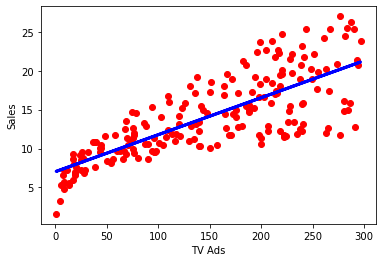

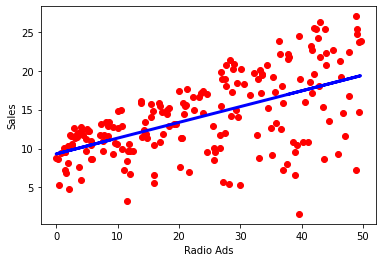

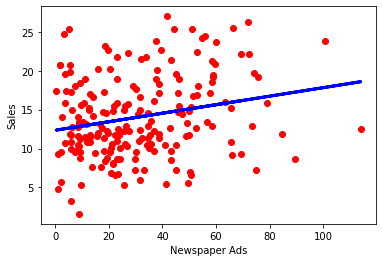

In [47]:
# Simple linear regression with TV as the independent variable
plt.scatter(TV, Sales, color = 'red')

plt.xlabel('TV Ads')

plt.ylabel('Sales')

plt.plot(TV, tv_model.predict(TV), color = 'blue', linewidth = 3)

plt.show()

# Simple linear regression with Radio as the independent variable
plt.scatter(Radio, Sales,  color = 'red')

plt.xlabel('Radio Ads')

plt.ylabel('Sales')

plt.plot(Radio, radio_model.predict(Radio), color = 'blue', linewidth = 3)

plt.show()

# Simple linear regression with Newspaper as the independent variable
plt.scatter(Newspaper, Sales, color = 'red')

plt.xlabel('Newspaper Ads')

plt.ylabel('Sales')

plt.plot(Newspaper, newspaper_model.predict(Newspaper), color = 'blue', linewidth = 3)

plt.show()

## **Multiple Linear Regression**

Let us now build a multiple linear regression model, i.e., we will use all three features to predict the target variable - sales.

In [48]:
mlr_model = linear_model.LinearRegression()

mlr_model.fit(Ad_df[['TV', 'Radio', 'Newspaper']], Ad_df['Sales'])

LinearRegression()

In [49]:
Ad_df['Sales_Predicted'] = mlr_model.predict(Ad_df[['TV', 'Radio', 'Newspaper']]) 

Ad_df['Error'] = (Ad_df['Sales_Predicted'] - Ad_df['Sales'])**2

MSE_MLR = Ad_df['Error'].mean()

In [50]:
MSE_MLR

2.784126314510936

In [51]:
mlr_model.score(Ad_df[['TV', 'Radio', 'Newspaper']], Ad_df['Sales'])

0.8972106381789522

**Observation:** 

- The R^2 value for the multiple linear regression comes out to be **89.7%.** This is much better than any of the simple linear regression models.

Let's now try to use the statsmodels library to get a more detailed model interpretation.

In [52]:
# Let us get a more detailed model using statsmodels

import statsmodels.formula.api as smf

lm1 = smf.ols(formula = 'Sales ~ TV+Radio+Newspaper', data = Ad_df).fit()

lm1.params

print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 13 Apr 2022   Prob (F-statistic):           1.58e-96
Time:                        18:20:22   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [53]:
print("*************Parameters**************")

print(lm1.params)

print("*************P-Values**************")

print(lm1.pvalues)

print("************Standard Errors***************")

print(lm1.bse) 

print("*************Confidence Interval**************")

print(lm1.conf_int())

print("*************Error Covariance Matrix**************")

print(lm1.cov_params())

*************Parameters**************
Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64
*************P-Values**************
Intercept    1.267295e-17
TV           1.509960e-81
Radio        1.505339e-54
Newspaper    8.599151e-01
dtype: float64
************Standard Errors***************
Intercept    0.311908
TV           0.001395
Radio        0.008611
Newspaper    0.005871
dtype: float64
*************Confidence Interval**************
                  0         1
Intercept  2.323762  3.554016
TV         0.043014  0.048516
Radio      0.171547  0.205513
Newspaper -0.012616  0.010541
*************Error Covariance Matrix**************
           Intercept            TV         Radio     Newspaper
Intercept   0.097287 -2.657273e-04 -1.115489e-03 -5.910212e-04
TV         -0.000266  1.945737e-06 -4.470395e-07 -3.265950e-07
Radio      -0.001115 -4.470395e-07  7.415335e-05 -1.780062e-05
Newspaper  -0.000591 -3.265950e-07 -1.780062e-05  3.446875

**Observations:**
* The p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.
* The p-value for the Newspaper variable is 0.85, which is higher than 0.05. This shows that the Newspaper variable is insignificant.
* The R-squared value for the Linear Regression model is ~0.90, which indicates that the model is able to explain almost 90% variance in the target variable.

## **Visualizing the confidence bands in Simple Linear Regression**

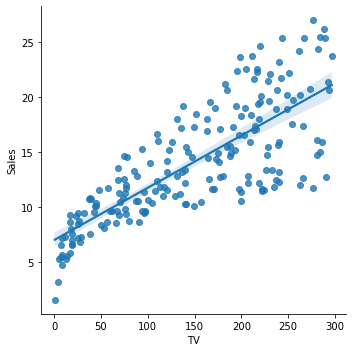

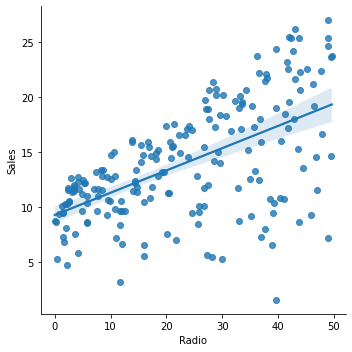

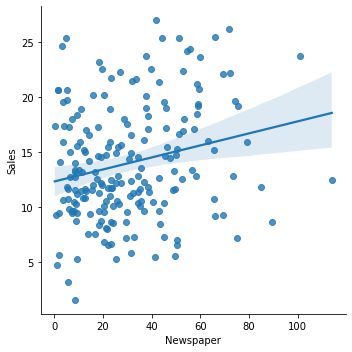

In [54]:
import seaborn as sns

sns.lmplot(x = 'TV', y = 'Sales', data = Ad_df)

sns.lmplot(x = 'Radio', y = 'Sales', data = Ad_df )

sns.lmplot(x = 'Newspaper', y = 'Sales', data = Ad_df)

# **Model Evaluation: Cross validation and Bootstrapping**

- We observed that the variable 'Newspaper' can be omitted from the list of significant features owing to the p-value.
- Let us now run the regression analysis adding a multiplicative feature in it.

In [55]:
Ad_df['TVandRadio'] = Ad_df['TV'] * Ad_df['Radio']

In [56]:
# Let us remove the sales_predicted and the error column generated earlier

Ad_df.drop(columns = ["Error", "Sales_Predicted"], inplace = True)

In [57]:
# Let us do the modelling with new features

import statsmodels.formula.api as smf

lm2 = smf.ols(formula = 'Sales ~ TV+Radio + Newspaper + TVandRadio', data = Ad_df).fit()

lm2.params

print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1466.
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          2.92e-144
Time:                        18:20:23   Log-Likelihood:                -270.04
No. Observations:                 200   AIC:                             550.1
Df Residuals:                     195   BIC:                             566.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7284      0.253     26.561      0.0

**Observation:**

- We see an increase in the R-squared here. However, is this model useful for prediction? Does it predict well for the unseen data? Let us find out!

## **Performance assessment, testing, and validation**

### **Train, Test, and Validation set**

- We will split the data into three sets, one to train the model, one to validate the model performance (not seen during training) and make improvements, and the last to test the model.

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
features_base = [i for i in Ad_df.columns if i not in ("Sales" , "TVandRadio")]

features_added = [i for i in Ad_df.columns if i not in "Sales"]

target = 'Sales'

# Splitting the original data into train and test sets
train, test = train_test_split(Ad_df, test_size = 0.10, train_size = 0.9, random_state = 1)

In [60]:
# Splitting the above training data into train and validation sets
train, validation = train_test_split(train, test_size = 0.2, train_size = 0.80, random_state = 1)

In [61]:
train.shape, validation.shape, test.shape

((144, 5), (36, 5), (20, 5))

In [62]:
# Now, let us fit the model and find the performance on training and validation sets

from sklearn.linear_model import LinearRegression

mlr = LinearRegression()

mlr.fit(train[features_base], train[target])

print("*********Training set Metrics**************")

print("R-Squared:", mlr.score(train[features_base], train[target]))

se_train = (train[target] - mlr.predict(train[features_base]))**2

mse_train = se_train.mean()

print('MSE: ', mse_train)

print("********Validation set Metrics**************")

print("R-Squared:", mlr.score(validation[features_base], validation[target]))

se_val = (validation[target] - mlr.predict(validation[features_base]))**2

mse_val = se_val.mean()

print('MSE: ', mse_val)

*********Training set Metrics**************
R-Squared: 0.9094027928793047
MSE:  2.722181832122794
********Validation set Metrics**************
R-Squared: 0.8235994856519824
MSE:  3.3130452990550636


**Observations:**

- We observe that the R-squared is higher on the training data in comparison to the validation data and MSE is lower on the training data in comparison to the validation data.
- This implies that the model is slightly overfitting the training data.

In [63]:
# Can we increase the model performance by adding the new feature? 

# We found that to be the case in the analysis above but let's check the same for the validation dataset

mlr_added_feature = LinearRegression()

mlr_added_feature.fit(train[features_added], train[target])

print("*********Training set Metrics**************")

print("R-Squared:", mlr_added_feature.score(train[features_added], train[target]))

se_train = (train[target] - mlr_added_feature.predict(train[features_added]))**2

mse_train = se_train.mean()

print('MSE: ', mse_train)

print("********Validation set Metrics**************")

print("R-Squared:", mlr_added_feature.score(validation[features_added], validation[target]))

se_val = (validation[target] - mlr_added_feature.predict(validation[features_added]))**2

mse_val = se_val.mean()

print('MSE: ', mse_val)

*********Training set Metrics**************
R-Squared: 0.9671620223595259
MSE:  0.9866854506614621
********Validation set Metrics**************
R-Squared: 0.9597611053967473
MSE:  0.7557420175174034


**Observations:**
- We observe that the R-squared increased as we would expect after adding a new feature. The MSE has also decreased. 
- The overfitting is reduced and the model is giving more generalized performance now. 

Let us now fit a regularized model.

## **Regularization**

In [64]:
features_added

['TV', 'Radio', 'Newspaper', 'TVandRadio']

In [65]:
from sklearn.linear_model import Ridge

from sklearn.linear_model import Lasso

# Fitting Ridge regression with the default features

ridge = Ridge()

ridge.fit(train[features_added], train[target])

print("*********Training set Metrics**************")

print("R-Squared:", ridge.score(train[features_added], train[target]))

se_train = (train[target] - ridge.predict(train[features_added]))**2

mse_train = se_train.mean()

print('MSE: ', mse_train)

print("********Validation set Metrics**************")

print("R-Squared:", ridge.score(validation[features_added], validation[target]))

se_val = (validation[target] - ridge.predict(validation[features_added]))**2

mse_val = se_val.mean()

print('MSE: ', mse_val)

*********Training set Metrics**************
R-Squared: 0.9671620223085567
MSE:  0.9866854521929357
********Validation set Metrics**************
R-Squared: 0.9597629105527914
MSE:  0.7557081141936639


In [66]:
from sklearn.linear_model import Ridge

from sklearn.linear_model import Lasso

# Fitting Lasso regression with the default features

lasso = Lasso()

lasso.fit(train[features_added], train[target])

print("*********Training set Metrics**************")

print("R-Squared:", lasso.score(train[features_added], train[target]))

se_train = (train[target] - lasso.predict(train[features_added]))**2

mse_train = se_train.mean()

print('MSE: ', mse_train)

print("********Validation set Metrics**************")

print("R-Squared:", lasso.score(validation[features_added], validation[target]))

se_val = (validation[target] - lasso.predict(validation[features_added]))**2

mse_val = se_val.mean()

print('MSE: ', mse_val)

*********Training set Metrics**************
R-Squared: 0.9664951415258186
MSE:  1.0067232746452661
********Validation set Metrics**************
R-Squared: 0.96554549004555
MSE:  0.6471032845779189


In [67]:
# Let us predict on the unseen data using the Ridge regression

rsq_test = ridge.score(test[features_added], test[target])

se_test = (test[target] - ridge.predict(test[features_added]))**2

mse_test = se_test.mean()

print("*****************Test set Metrics******************")

print("Rsquared: ", rsq_test)

print("MSE: ", mse_test)

print("Intercept is {} and Coefficients are {}".format(ridge.intercept_, ridge.coef_))

*****************Test set Metrics******************
Rsquared:  0.9782287288583794
MSE:  0.3633625153536476
Intercept is 6.400611452367672 and Coefficients are [0.02127321 0.0410115  0.00051154 0.00100741]


## **K-Fold and LooCV**

- We will now evaluate the performance of the model using the LooCV and K-Fold methods.

In [68]:
from sklearn.linear_model import Ridge

from sklearn.linear_model import Lasso

from sklearn.model_selection import cross_val_score

In [69]:
ridgeCV = Ridge()

cvs = cross_val_score(ridgeCV, Ad_df[features_added], Ad_df[target], cv = 10)

print("Mean Score:")

print(cvs.mean(), "\n")

print("Confidence Interval:")

cvs.mean() - cvs.std(), cvs.mean() + cvs.std() 

# Note that the same can be set as LooCV if cv parameter above is set to n, i.e., 200.

Mean Score:
0.9649887636257694 

Confidence Interval:


(0.9430473456799697, 0.986930181571569)

### **Extra: Statsmodels to fit regularized model**

You can also use the statsmodels library to fit regularized regression models, i.e., Ridge and Lasso. The code in the below cell is commented. In case you are interested, you can uncomment the code and run the cell to get the output. 

In [70]:
# import statsmodels.formula.api as smf

## Here, lasso is fit
# lm3 = smf.ols(formula = 'Sales ~ TV+Radio+Newspaper+TVandRadio', data = Ad_df).fit_regularized(method = 'elastic_net', L1_wt = 1)
# print("*************Parameters**************")
# print(lm3.params)

## Here, ridge regularization has been fit
# lm4 = smf.ols(formula = 'Sales ~ TV+Radio+Newspaper+TVandRadio', data = Ad_df).fit_regularized(method = 'elastic_net', L1_wt = 0)
# print("*************Parameters**************")
# print(lm4.params)

## **Bootstrapping**

In [71]:
# Let us get a more detailed model using statsmodels

import statsmodels.formula.api as smf

lm2 = smf.ols(formula = 'Sales ~ TV', data = Ad_df).fit()

lm2.params

print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 13 Apr 2022   Prob (F-statistic):           1.47e-42
Time:                        18:20:27   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

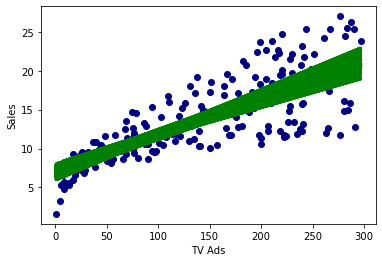

In [79]:
# Now, let us calculate the slopes a 1000 times using bootstrapping

import statsmodels.formula.api as smf

Slope = []

for i in range(1000):
    bootstrap_df = Ad_df.sample(n = 200, replace = True)

    lm3 = smf.ols(formula = 'Sales ~ TV', data = bootstrap_df).fit()

    Slope.append(lm3.params.TV)

    plt.xlabel('TV Ads')

    plt.ylabel('Sales')

    plt.plot(bootstrap_df['TV'], lm3.predict(bootstrap_df['TV']), color = 'green', linewidth = 3)

plt.scatter(Ad_df['TV'], Ad_df['Sales'], color = (0, 0, 0.5))

plt.show()


In [80]:
# Let's now find out the 2.5 and 97.5 percentile for the slopes obtained

import numpy as np

Slope = np.array(Slope)

Sort_Slope = np.sort(Slope)

Slope_limits = np.percentile(Sort_Slope, (2.5, 97.5))

Slope_limits

array([0.04175036, 0.05318831])

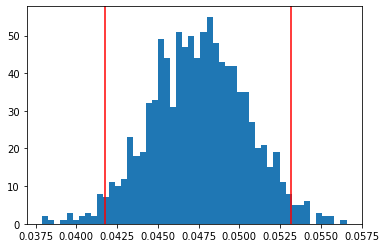

In [82]:
# Plotting the slopes and the upper and the lower limits

plt.hist(Slope, 50)

plt.axvline(Slope_limits[0], color = 'r')

plt.axvline(Slope_limits[1], color = 'r')